# Data import

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays


from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot
from plotnine import *

In [30]:
total = pd.read_csv('./files/tatol.csv')

# 데이터 시간대별 처리

In [31]:
def _trans_date_time(df):
    df.index = pd.to_datetime(df['event_timestamp'], infer_datetime_format=True)
    df.drop('event_timestamp', axis=1, inplace=True)
    return df

_trans_date_time(total)

,Unnamed: 0,session_id,event_name,user_no,item_no,device_type,region,platform,rating,birth_date,...,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
event_timestamp,,,,,,,,,,,,,,,,,,,,,
2021-06-11 00:36:40.265024,2255797,c8c66cdfc2286951af36bd11f26575f2,click_item,5cDoQ298+z7/vx/fNVoZFw==,NdCPDxLau3caXTbPoO2KFA==,mobile,Seoul,IOS,1,1976-05-10,...,0e8ff9cc6221b8c4c060786c1c2e0bc5,198000.0,243100100,의류,243103100,원피스/점프수트,243103101,원피스,3739.0,avamolli
2021-06-29 11:47:03.741037,4183409,35101c1b373142946d4ab22787a809b9,click_item,moLuwbMr1ZLKJoBHmRgCqg==,9viu9/Vp1NMnPXgmvxKdrw==,mobile,Seoul,ANDROID,1,1961-03-20,...,a6997ae34edb96e42ffbbccdd1a1b00a,58000.0,243100100,의류,243104100,하의,243104101,바지,13865.0,ucberkeley
2021-07-11 22:31:42.904002,375000,5c901cfba8cf2c4d25b638aef513a52a,click_item,QA9tQMeKUyUIgAKlbSfpYw==,1B4CTtvF1BeNFZzrdtx4vQ==,mobile,Gangwon-do,IOS,1,1987-09-23,...,dc38dced60dfa3a5ac19d367bb10a3c5,67500.0,243100100,의류,243104100,하의,243104101,바지,2649.0,THOMASMORE
2021-08-02 19:09:15.173024,5456436,58ac3e65ccf2eb4988b58208f252d359,click_item,bCMrhzWWzYxzqInKRUFzew==,ZnZNKHuqlz863Bo1wkKcLw==,mobile,Daegu,IOS,1,2000-03-28,...,ada54816bc84fde22196b7df843ed754,39900.0,244100100,잡화,244106100,주얼리,244106103,목걸이,11744.0,CLUE
2021-07-18 16:15:52.274029,4704356,990ecc138c1cbd618aca7cfd08cd1aa8,click_item,/B+O3jb7d/LeH4nKOZDpKg==,11ZJqzJf0OKHy5xVWscPrw==,mobile,Gyeongsangnam-do,IOS,1,1982-04-16,...,913e07943fe547acfdd1be8939c10e9b,59000.0,248100100,가구/인테리어,248112100,커튼/블라인드,248112102,커튼/로만세트,7726.0,에이미루시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15 18:54:19.918064,5061676,010a10c3d038a9778b054616988a3840,click_item,OKOXQiBMaEet0w4tVwlrCw==,bMgc9d9iMOXMI1H+JkdHYw==,mobile,Seoul,IOS,1,1994-01-22,...,dedbd76d8592b0e91b1786b8f329c106,49900.0,243100100,의류,243102100,상의,243102103,티셔츠,13304.0,polham
2021-06-23 18:10:56.236026,3202842,bfdb2e825c648d3153a5709492f925a0,click_item,DYhM5p/b/7nkhUZCJvXj5A==,z10Ej/yvd1gRFxX6rl0XKQ==,mobile,Seoul,IOS,1,1991-03-14,...,5dec0844e00c4b5266d97d331d972e85,33220.0,243100100,의류,243104100,하의,243104101,바지,6632.0,toii
2021-07-31 12:40:03.685106,3483006,e7cee6d0db15ce5cf52189c0053a93e8,click_item,9j/RJVy3uuEiJ7NBZlZAYQ==,OWkbrvUMsJWYui+puYQhog==,mobile,Seoul,IOS,1,1998-12-16,...,2914aa53f6b0a5a5f57975a56b95f89d,85000.0,243100100,의류,243103100,원피스/점프수트,243103101,원피스,6513.0,LOEIL


In [32]:
total["Year"] = total.index.year 
total["Month"] = total.index.month
total["Day"] = total.index.day
total["Hour"] = total.index.hour
total['Minute'] = total.index.minute
total["Date"] = pd.DatetimeIndex(total.index).date

In [33]:
total.head()

,Unnamed: 0,session_id,event_name,user_no,item_no,device_type,region,platform,rating,birth_date,...,category3_code,category3_name,brand_no,brand_name,Year,Month,Day,Hour,Minute,Date
event_timestamp,,,,,,,,,,,,,,,,,,,,,
2021-06-11 00:36:40.265024,2255797,c8c66cdfc2286951af36bd11f26575f2,click_item,5cDoQ298+z7/vx/fNVoZFw==,NdCPDxLau3caXTbPoO2KFA==,mobile,Seoul,IOS,1,1976-05-10,...,243103101,원피스,3739.0,avamolli,2021,6,11,0,36,2021-06-11
2021-06-29 11:47:03.741037,4183409,35101c1b373142946d4ab22787a809b9,click_item,moLuwbMr1ZLKJoBHmRgCqg==,9viu9/Vp1NMnPXgmvxKdrw==,mobile,Seoul,ANDROID,1,1961-03-20,...,243104101,바지,13865.0,ucberkeley,2021,6,29,11,47,2021-06-29
2021-07-11 22:31:42.904002,375000,5c901cfba8cf2c4d25b638aef513a52a,click_item,QA9tQMeKUyUIgAKlbSfpYw==,1B4CTtvF1BeNFZzrdtx4vQ==,mobile,Gangwon-do,IOS,1,1987-09-23,...,243104101,바지,2649.0,THOMASMORE,2021,7,11,22,31,2021-07-11
2021-08-02 19:09:15.173024,5456436,58ac3e65ccf2eb4988b58208f252d359,click_item,bCMrhzWWzYxzqInKRUFzew==,ZnZNKHuqlz863Bo1wkKcLw==,mobile,Daegu,IOS,1,2000-03-28,...,244106103,목걸이,11744.0,CLUE,2021,8,2,19,9,2021-08-02
2021-07-18 16:15:52.274029,4704356,990ecc138c1cbd618aca7cfd08cd1aa8,click_item,/B+O3jb7d/LeH4nKOZDpKg==,11ZJqzJf0OKHy5xVWscPrw==,mobile,Gyeongsangnam-do,IOS,1,1982-04-16,...,248112102,커튼/로만세트,7726.0,에이미루시,2021,7,18,16,15,2021-07-18


22    0.086120
23    0.085158
0     0.070965
21    0.066153
20    0.054366
1     0.049675
16    0.045526
19    0.045465
15    0.043300
13    0.042699
12    0.042038
17    0.041316
10    0.040895
14    0.040895
18    0.040835
11    0.040474
9     0.034280
8     0.033798
2     0.029529
3     0.019425
7     0.018282
6     0.010885
4     0.009201
5     0.008720
Name: Hour, dtype: float64

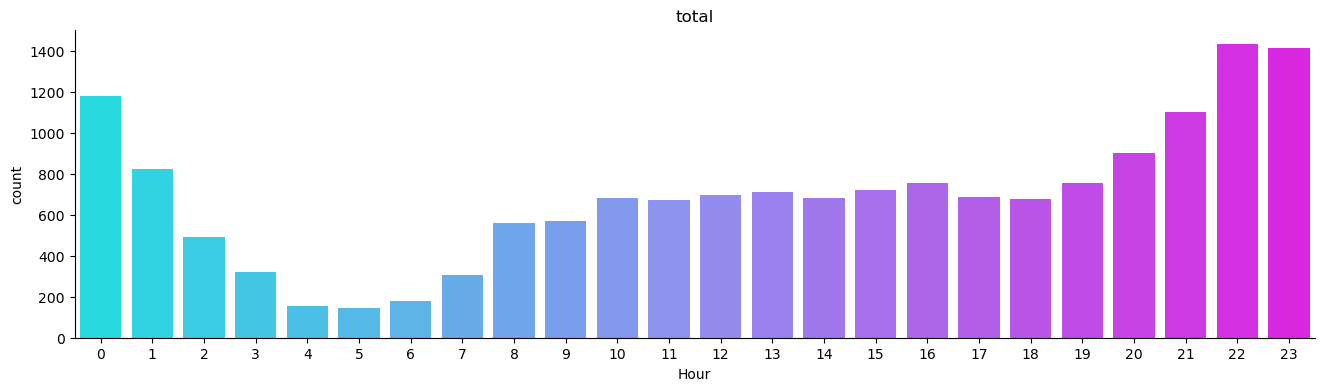

In [34]:
plt.figure(figsize=(16, 4))
display(total["Hour"].value_counts(normalize=True))
sns.countplot(data=total, x="Hour", palette='cool')
# sns.set_palette('Paired', 9)
plt.title('total')
plt.xticks()
sns.despine()

## 메인시간대와, 서브시간대 분석

In [35]:
total['Hour'] = total['Hour'].replace(0, 24)

In [37]:
main_time = total[total['Hour'] > 19]
sub_time = total[total['Hour'] <= 19]

In [40]:
main_time.columns

Index(['Unnamed: 0', 'session_id', 'event_name', 'user_no', 'item_no',
       'device_type', 'region', 'platform', 'rating', 'birth_date', 'gender',
       'age', 'item_name', 'image_name', 'price', 'category1_code',
       'category1_name', 'category2_code', 'category2_name', 'category3_code',
       'category3_name', 'brand_no', 'brand_name', 'Year', 'Month', 'Day',
       'Hour', 'Minute', 'Date'],
      dtype='object')

In [47]:
# 메인 시간대 (20 ~ 24)
success = main_time[main_time['event_name'] == 'purchase_success'] # click_item, purchase_success

userid_rating_df = pd.DataFrame({'count': success.groupby(['brand_name', 'event_name']).size()}) 
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10).sort_values(by='count', ascending=False)

# 각 컬럼별로 특징을 찾으려고 했지만 찾지못했다

,brand_name,event_name,count
6,ALVINCLO,purchase_success,9
8,ANOTHEROFFICE,purchase_success,4
3,ABONNE,purchase_success,3
0,1507,purchase_success,2
7,ANEDIT,purchase_success,2
1,210edit,purchase_success,1
2,38comeoncommon,purchase_success,1
4,ADIDAS_비비엘유이,purchase_success,1
5,AHE,purchase_success,1
9,ARETHAT,purchase_success,1


In [53]:
# 서브 시간대 (1 ~ 19)
success = sub_time[sub_time['event_name'] == 'purchase_success'] # click_item

userid_rating_df = pd.DataFrame({'count': success.groupby(['brand_name', 'event_name']).size()}) #category1_name, category3_name
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10).sort_values(by='count', ascending=False)

# 각 컬럼별로 특징을 찾으려고 했지만 찾지못했다

,brand_name,event_name,count
0,1507,purchase_success,8
2,38comeoncommon,purchase_success,3
1,210edit,purchase_success,1
3,3FISH,purchase_success,1
4,47brand_이든,purchase_success,1
5,A.P.C._마이트레이딩홀딩스,purchase_success,1
6,A.P.C._이랜드리테일,purchase_success,1
7,AAA,purchase_success,1
8,ABONNE,purchase_success,1
9,ADIDAS_한아,purchase_success,1


# Prophet

In [57]:
total.columns

Index(['Unnamed: 0', 'session_id', 'event_name', 'user_no', 'item_no',
       'device_type', 'region', 'platform', 'rating', 'birth_date', 'gender',
       'age', 'item_name', 'image_name', 'price', 'category1_code',
       'category1_name', 'category2_code', 'category2_name', 'category3_code',
       'category3_name', 'brand_no', 'brand_name', 'Year', 'Month', 'Day',
       'Hour', 'Minute', 'Date'],
      dtype='object')

In [58]:
click_item = total[total['event_name'] == 'click_item']
purchase_success = total[total['event_name'] == 'purchase_success']
add_to_cart = total[total['event_name'] == 'add_to_cart']
like_item = total[total['event_name'] == 'like_item']

## click_item

In [64]:
date_list = list(set(click_item['Date']))
columns = ['ds', 'y']                 
rating_mean = pd.DataFrame(columns=columns)
for date in date_list:
    rating = click_item.loc[click_item['Date'] == date]
    rating_mean = rating_mean.append(pd.DataFrame([[date, rating['rating'].sum()]], columns=columns), ignore_index=True)
rating_mean

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\2375326242.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\2375326242.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\2375326242.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\2375326242.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\2375326242.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

,ds,y
0,2021-06-16,234
1,2021-06-27,246
2,2021-07-06,232
3,2021-06-19,236
4,2021-07-01,264
...,...,...
58,2021-07-14,228
59,2021-06-14,143
60,2021-07-02,244
61,2021-06-04,177


02:05:34 - cmdstanpy - INFO - Chain [1] start processing
02:05:34 - cmdstanpy - INFO - Chain [1] done processing


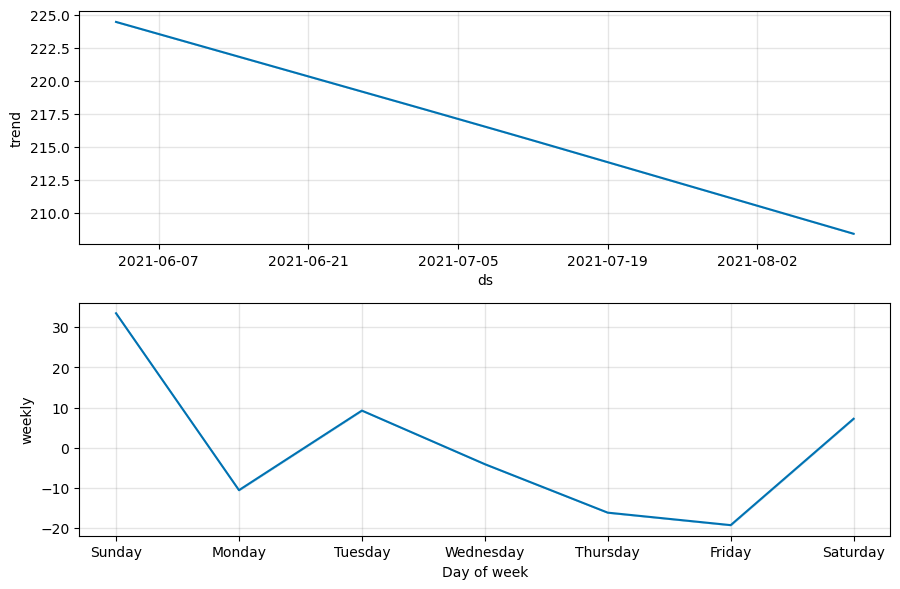

In [65]:
prophet = Prophet()
prophet.fit(rating_mean)


future = prophet.make_future_dataframe(periods=7, freq = 'D')
forecast = prophet.predict(future)

fig2 = prophet.plot_components(forecast)
plt.show()

In [66]:
plot_plotly(prophet, forecast)

In [69]:
evaluation_model = cross_validation(prophet, initial='30 days', period='15 days', horizon = '7 days')
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('rmse')

  0%|          | 0/2 [00:00<?, ?it/s]

02:18:50 - cmdstanpy - INFO - Chain [1] start processing
02:18:50 - cmdstanpy - INFO - Chain [1] done processing
02:18:51 - cmdstanpy - INFO - Chain [1] start processing
02:18:51 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
4,5 days,338.768584,18.405667,17.745269,0.080829,0.080829,0.078178,1.0
5,6 days,836.038432,28.914329,28.914313,0.142564,0.142564,0.133070,1.0
2,3 days,1026.732684,32.042670,28.519457,0.143864,0.143864,0.131781,1.0
0,1 days,1729.943639,41.592591,37.376787,0.214695,0.214695,0.187561,0.5
1,2 days,1837.981920,42.871691,41.222182,0.224988,0.224988,0.205201,0.5
3,4 days,2127.798465,46.128066,40.874670,0.189931,0.189931,0.171180,0.5
6,7 days,8496.013614,92.173823,75.472297,0.649845,0.649845,0.422510,0.5


## purchase_success

In [70]:
date_list = list(set(purchase_success['Date']))
columns = ['ds', 'y']                 
rating_mean = pd.DataFrame(columns=columns)
for date in date_list:
    rating = purchase_success.loc[purchase_success['Date'] == date]
    rating_mean = rating_mean.append(pd.DataFrame([[date, rating['rating'].sum()]], columns=columns), ignore_index=True)
rating_mean

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\513555586.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\513555586.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\513555586.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\513555586.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\513555586.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,ds,y
0,2021-06-16,144
1,2021-06-27,72
2,2021-07-06,108
3,2021-06-19,56
4,2021-07-01,124
...,...,...
58,2021-06-14,84
59,2021-06-04,60
60,2021-07-02,152
61,2021-07-14,76


02:22:57 - cmdstanpy - INFO - Chain [1] start processing
02:22:57 - cmdstanpy - INFO - Chain [1] done processing


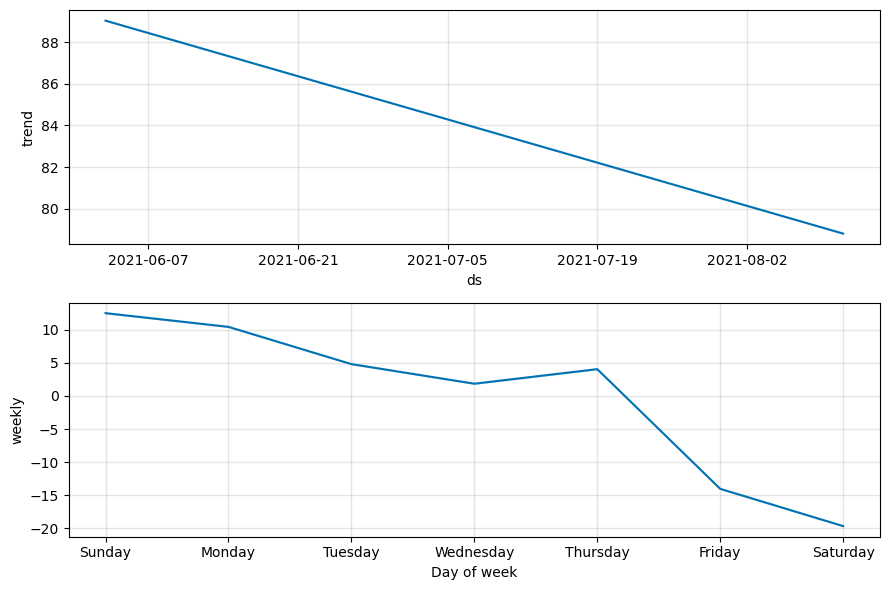

In [71]:
prophet = Prophet()
prophet.fit(rating_mean)


future = prophet.make_future_dataframe(periods=7, freq = 'D')
forecast = prophet.predict(future)

fig2 = prophet.plot_components(forecast)
plt.show()

In [72]:
plot_plotly(prophet, forecast)

In [73]:
evaluation_model = cross_validation(prophet, initial='30 days', period='15 days', horizon = '7 days')
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('rmse')

  0%|          | 0/2 [00:00<?, ?it/s]

02:22:58 - cmdstanpy - INFO - Chain [1] start processing
02:22:58 - cmdstanpy - INFO - Chain [1] done processing
02:22:58 - cmdstanpy - INFO - Chain [1] start processing
02:22:58 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
5,6 days,191.817451,13.849818,13.608023,0.150959,0.150959,0.142784,1.0
3,4 days,249.844711,15.806477,15.080445,0.144192,0.144192,0.155839,1.0
1,2 days,595.581743,24.404543,22.685105,0.234070,0.234070,0.238760,1.0
4,5 days,615.424331,24.807747,22.994351,0.283357,0.283357,0.243305,1.0
0,1 days,1283.221780,35.822085,35.368258,0.501989,0.501989,0.400900,0.5
2,3 days,1299.317206,36.046043,34.753540,0.789853,0.789853,0.557473,0.5
6,7 days,3787.129726,61.539660,59.325561,2.208040,2.208040,0.894314,0.0


## add_to_cart

In [74]:
date_list = list(set(add_to_cart['Date']))
columns = ['ds', 'y']                 
rating_mean = pd.DataFrame(columns=columns)
for date in date_list:
    rating = add_to_cart.loc[add_to_cart['Date'] == date]
    rating_mean = rating_mean.append(pd.DataFrame([[date, rating['rating'].sum()]], columns=columns), ignore_index=True)
rating_mean

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\3619248356.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\3619248356.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\3619248356.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\3619248356.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\3619248356.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use

,ds,y
0,2021-06-16,39
1,2021-06-27,57
2,2021-07-06,45
3,2021-06-19,36
4,2021-07-01,81
...,...,...
58,2021-06-14,27
59,2021-06-04,24
60,2021-07-02,87
61,2021-07-14,36


02:23:53 - cmdstanpy - INFO - Chain [1] start processing
02:23:53 - cmdstanpy - INFO - Chain [1] done processing


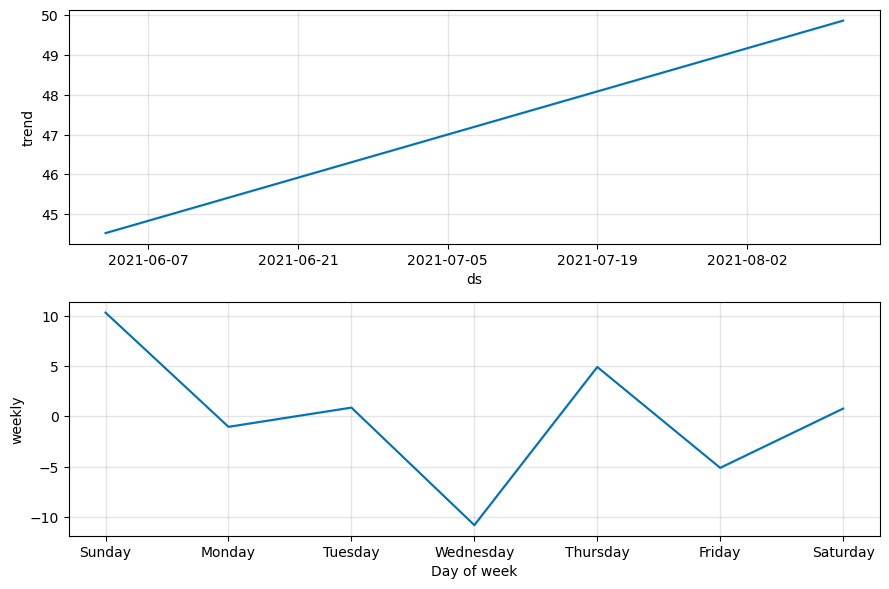

In [75]:
prophet = Prophet()
prophet.fit(rating_mean)


future = prophet.make_future_dataframe(periods=7, freq = 'D')
forecast = prophet.predict(future)

fig2 = prophet.plot_components(forecast)
plt.show()

In [76]:
plot_plotly(prophet, forecast)

In [77]:
evaluation_model = cross_validation(prophet, initial='30 days', period='15 days', horizon = '7 days')
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('rmse')

  0%|          | 0/2 [00:00<?, ?it/s]

02:23:55 - cmdstanpy - INFO - Chain [1] start processing
02:23:55 - cmdstanpy - INFO - Chain [1] done processing
02:23:55 - cmdstanpy - INFO - Chain [1] start processing
02:23:55 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
6,7 days,38.828161,6.231225,5.100056,0.079765,0.079765,0.083259,1.0
1,2 days,172.854247,13.147405,11.741344,0.338417,0.338417,0.269640,1.0
0,1 days,292.261675,17.095662,14.443014,0.379559,0.379559,0.296142,0.5
3,4 days,370.404684,19.245900,17.753675,0.413428,0.413428,0.327105,0.5
5,6 days,613.999103,24.779005,23.517990,0.520610,0.520610,0.421643,0.5
2,3 days,904.347317,30.072368,23.244367,0.827163,0.827163,0.480969,0.5
4,5 days,979.345778,31.294501,26.180961,0.709318,0.709318,0.472812,0.5


## like_item

In [78]:
date_list = list(set(like_item['Date']))
columns = ['ds', 'y']                 
rating_mean = pd.DataFrame(columns=columns)
for date in date_list:
    rating = like_item.loc[like_item['Date'] == date]
    rating_mean = rating_mean.append(pd.DataFrame([[date, rating['rating'].sum()]], columns=columns), ignore_index=True)
rating_mean

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\996372947.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\996372947.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\996372947.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\996372947.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_12956\996372947.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,ds,y
0,2021-06-16,30
1,2021-06-27,22
2,2021-07-06,12
3,2021-06-19,28
4,2021-07-01,24
...,...,...
58,2021-06-14,14
59,2021-07-14,18
60,2021-07-02,12
61,2021-06-04,18


02:24:40 - cmdstanpy - INFO - Chain [1] start processing
02:24:40 - cmdstanpy - INFO - Chain [1] done processing


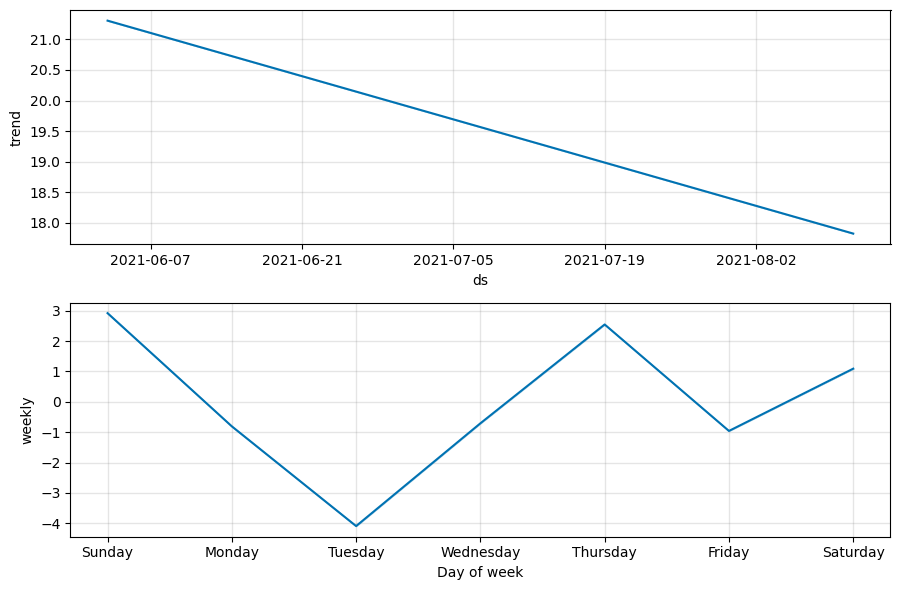

In [79]:
prophet = Prophet()
prophet.fit(rating_mean)


future = prophet.make_future_dataframe(periods=7, freq = 'D')
forecast = prophet.predict(future)

fig2 = prophet.plot_components(forecast)
plt.show()

In [80]:
plot_plotly(prophet, forecast)

In [81]:
evaluation_model = cross_validation(prophet, initial='30 days', period='15 days', horizon = '7 days')
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('rmse')

  0%|          | 0/2 [00:00<?, ?it/s]

02:24:41 - cmdstanpy - INFO - Chain [1] start processing
02:24:41 - cmdstanpy - INFO - Chain [1] done processing
02:24:41 - cmdstanpy - INFO - Chain [1] start processing
02:24:42 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
2,3 days,31.133528,5.579743,5.081662,0.300246,0.300246,0.252454,1.0
1,2 days,32.560662,5.706195,5.680289,0.264260,0.264260,0.254057,1.0
3,4 days,99.664273,9.983200,8.221127,0.624202,0.624202,0.414355,0.5
4,5 days,99.931065,9.996553,7.121802,0.885333,0.885333,0.470865,0.5
0,1 days,106.392394,10.314669,10.252302,0.659928,0.659928,0.491190,0.0
6,7 days,147.889268,12.160973,10.803466,1.474324,1.474324,0.699291,0.5
5,6 days,153.184196,12.376760,12.373926,1.485698,1.485698,0.814866,0.0
